In [1]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.models import Sequential, Model
from keras import applications
from keras.layers import Dropout, Flatten, Dense
from keras import optimizers

Using TensorFlow backend.


In [2]:
import pathlib

data_dir = pathlib.Path("DATA") # indiquer chemin  où sont les données

In [3]:
image_count = len(list(data_dir.glob('*/*'))) # compte le nb d'images dans le dossier
image_count

248

In [4]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]) 
CLASS_NAMES # liste des noms de dossiers

array(['De', 'Pour,vers'], dtype='<U9')

In [5]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) # 
BATCH_SIZE = image_count
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [6]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))
#On importe les images

Found 248 images belonging to 2 classes.


In [7]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')
        
#Fonction d'affichage des images

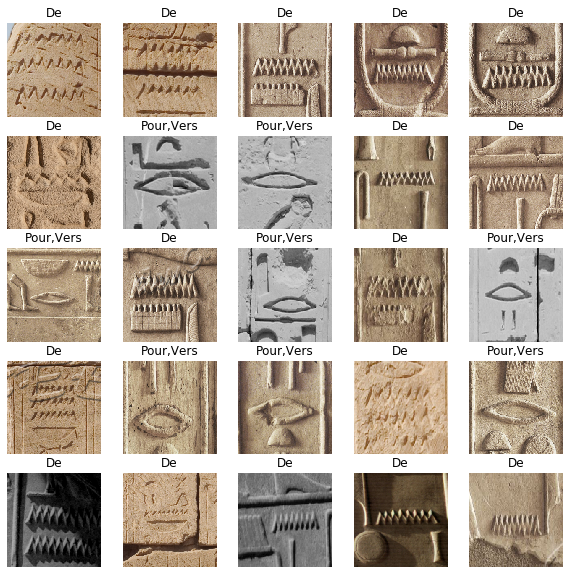

In [8]:
image_batch, label_batch = next(train_data_gen) #Pour séparer le label de l'image
show_batch(image_batch, label_batch)


In [9]:
def augm(datagen):
    datagen.fit(image_batch)
    augmT = []
    for el in datagen.flow(image_batch,shuffle=False,batch_size=BATCH_SIZE):
        for i in range(0, len(el)):
            if i == 0 : augmT.append(el[i])
            else : augmT.append(el[i])

        break
    augmT =  np.array(augmT)
    return augmT
        

In [10]:
"""train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    fill_mode = "nearest",
    zoom_range = 0.3,
    width_shift_range = 0.3,
    height_shift_range=0.3,
    rotation_range=30)"""

'train_datagen = ImageDataGenerator(\n    rescale = 1./255,\n    horizontal_flip = True,\n    fill_mode = "nearest",\n    zoom_range = 0.3,\n    width_shift_range = 0.3,\n    height_shift_range=0.3,\n    rotation_range=30)'

In [11]:
datagen = []
datagen.append(ImageDataGenerator(rotation_range=30))
datagen.append(ImageDataGenerator(zoom_range=[0.5,1.0]))
datagen.append(ImageDataGenerator(brightness_range=[0.9,1.01]))
datagen.append(ImageDataGenerator(fill_mode='constant'))
datagen.append(ImageDataGenerator(cval=255))
datagen.append(ImageDataGenerator(width_shift_range=[-50,50]))

#new_img =  np.concatenate((image_batch,augm(datagen)))
#new_label =  np.concatenate((label_batch,label_batch))


In [12]:
for i,gen in enumerate(datagen) :
    if i == 0:
        new_img =  np.concatenate((image_batch,augm(gen)))
        new_label =  np.concatenate((label_batch,label_batch))
    else: 
        new_img =  np.concatenate((new_img,augm(gen)))
        new_label =  np.concatenate((new_label,label_batch))


In [13]:
np.shape(new_img)

(1736, 224, 224, 3)

In [14]:
np.shape(new_label)

(1736, 2)

In [15]:
from sklearn.model_selection import train_test_split

(trainX, testX, trainY, testY) = train_test_split(new_img, new_label, test_size=0.25)

In [16]:
#sauvegarde weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath="weights/checkpoint_tfl.h5",
                                                 save_weights_only=True,
                                                 verbose=1)

In [17]:
model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (224, 224, 3))

In [18]:
x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(len(CLASS_NAMES), activation="softmax")(x)
model_final = Model(input = model.input, output = predictions)
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])
history = model_final.fit(trainX, trainY, epochs=10, 
                    validation_data=(testX, testY))
#,callbacks=[cp_callback]

C:\Users\theoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  import sys


Train on 1302 samples, validate on 434 samples
Epoch 1/10
1302/1302 [==============================] - 902s 693ms/step - loss: 0.7275 - accuracy: 0.7028 - val_loss: 0.2222 - val_accuracy: 0.9401
Epoch 2/10
1302/1302 [==============================] - 884s 679ms/step - loss: 0.1861 - accuracy: 0.9485 - val_loss: 0.0501 - val_accuracy: 0.9931
Epoch 3/10
1302/1302 [==============================] - 878s 674ms/step - loss: 0.0627 - accuracy: 0.9831 - val_loss: 0.0277 - val_accuracy: 0.9931
Epoch 4/10
1302/1302 [==============================] - 875s 672ms/step - loss: 0.0415 - accuracy: 0.9846 - val_loss: 0.0187 - val_accuracy: 0.9908
Epoch 5/10
1302/1302 [==============================] - 956s 735ms/step - loss: 0.0165 - accuracy: 0.9985 - val_loss: 0.0362 - val_accuracy: 0.9885
Epoch 6/10
1302/1302 [==============================] - 1058s 812ms/step - loss: 0.0213 - accuracy: 0.9969 - val_loss: 0.0096 - val_accuracy: 0.9954
Epoch 7/10
1302/1302 [==============================] - 1136s 87

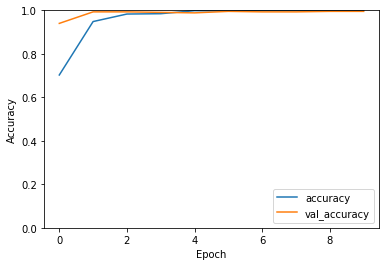

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_final.evaluate(testX,  testY, verbose=2)

In [20]:
print(test_acc)

0.9953917264938354


In [ ]:
pred = model_final.predict(image_batch)
pred[0]

In [ ]:
model_simi = Model(input = model.input, output =x)


In [ ]:
test = model_simi.predict(image_batch)

In [ ]:
from sklearn.manifold import TSNE
X = TSNE(n_components=3).fit_transform(test)

In [ ]:
quer = X[29]

In [ ]:
from scipy import spatial
X[spatial.KDTree(X).query(quer,k=6)[1]]

In [ ]:
distance,index = spatial.KDTree(X).query(quer,k=6)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for n in range(len(index)):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(np.squeeze(image_batch[index[n]]))
      plt.title(CLASS_NAMES[label_batch[index[n]]==1][0].title())
      plt.axis('off')